In [35]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
)
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv(r'C:/Users/carol/Downloads/teste_indicium_precificacao.csv')
df.head(3)

id                                 nome  host_id    host_name  \
0  2595                Skylit Midtown Castle     2845     Jennifer   
1  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth   
2  3831      Cozy Entire Floor of Brownstone     4869  LisaRoxanne   

  bairro_group        bairro  latitude  longitude        room_type  price  \
0    Manhattan       Midtown  40.75362  -73.98377  Entire home/apt    225   
1    Manhattan        Harlem  40.80902  -73.94190     Private room    150   
2     Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt     89   

   minimo_noites  numero_de_reviews ultima_review  reviews_por_mes  \
0              1                 45    2019-05-21             0.38   
1              3                  0           NaN              NaN   
2              1                270    2019-07-05             4.64   

   calculado_host_listings_count  disponibilidade_365  
0                              2                  355  
1                              1                  365  
2                              1                  194

In [3]:
#verificando informações da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [4]:
#verificando o tamanho da base
df.shape

(48894, 16)

In [5]:
#verificando valores nulos
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

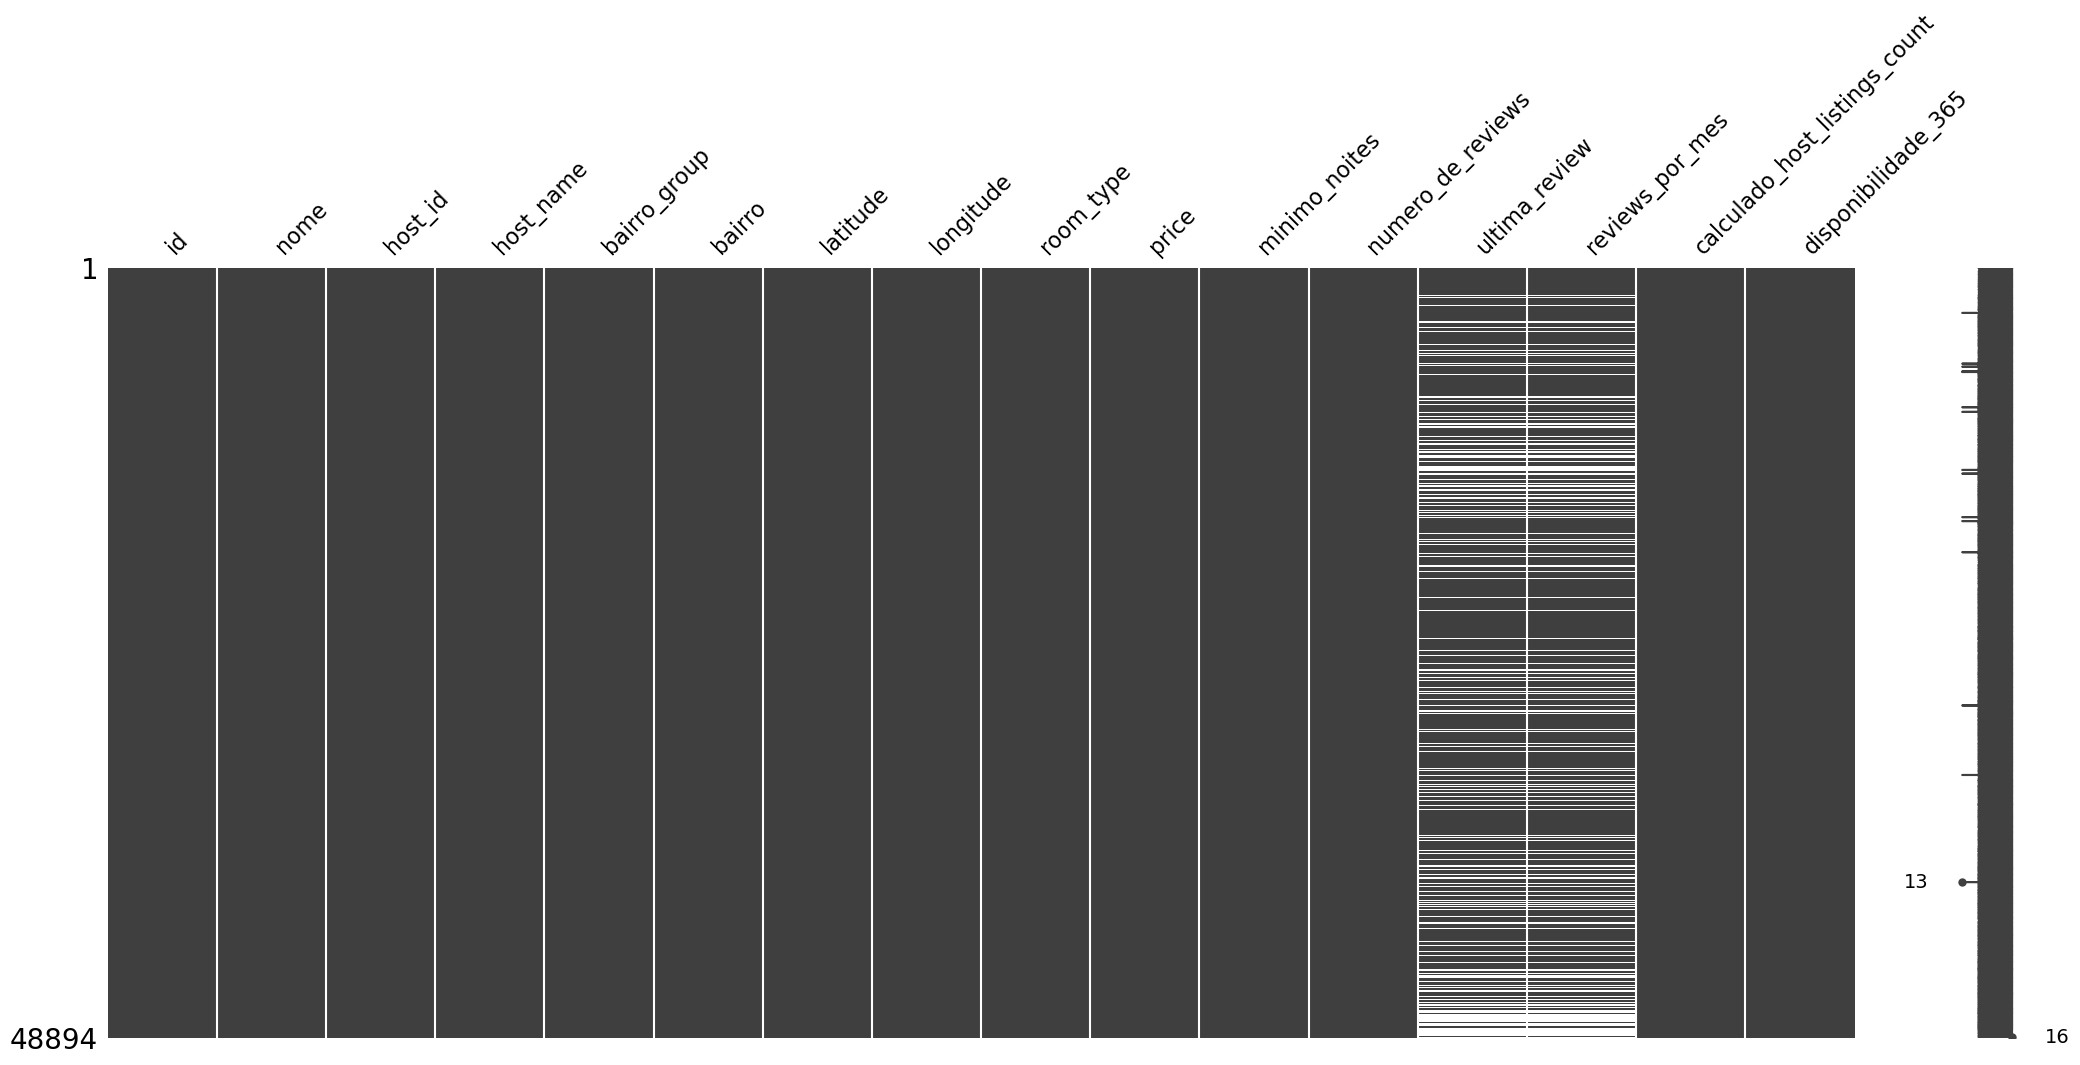

In [6]:
#visualizando valores nulos de forma gráfica
msno.matrix(df);

In [7]:
#vverificando dados duplicados
df.duplicated().sum()

0

#### Exclusão de colunas sem informação relevante nesse momento
- id
- host_id
- host_name

In [8]:
# a coluna 'id' não traz nenhuma informação importante, por isso, iremos excluí-la
df = df.drop(['id','host_name','host_id'], axis = 1)


In [9]:
df.describe()

latitude     longitude         price  minimo_noites  \
count  48894.000000  48894.000000  48894.000000   48894.000000   
mean      40.728951    -73.952169    152.720763       7.030085   
std        0.054529      0.046157    240.156625      20.510741   
min       40.499790    -74.244420      0.000000       1.000000   
25%       40.690100    -73.983070     69.000000       1.000000   
50%       40.723075    -73.955680    106.000000       3.000000   
75%       40.763117    -73.936273    175.000000       5.000000   
max       40.913060    -73.712990  10000.000000    1250.000000   

       numero_de_reviews  reviews_por_mes  calculado_host_listings_count  \
count       48894.000000     38842.000000                   48894.000000   
mean           23.274758         1.373251                       7.144005   
std            44.550991         1.680453                      32.952855   
min             0.000000         0.010000                       1.000000   
25%             1.000000         0.190000                       1.000000   
50%             5.000000         0.720000                       1.000000   
75%            24.000000         2.020000                       2.000000   
max           629.000000        58.500000                     327.000000   

       disponibilidade_365  
count         48894.000000  
mean            112.776169  
std             131.618692  
min               0.000000  
25%               0.000000  
50%              45.000000  
75%             227.000000  
max             365.000000

In [10]:
#melhorando a visualização do describe
with pd.option_context (
    'display.float_format','{:.2f}'.format,
    'display.max_columns', None,
):
    display(df.describe())

latitude  longitude    price  minimo_noites  numero_de_reviews  \
count  48894.00   48894.00 48894.00       48894.00           48894.00   
mean      40.73     -73.95   152.72           7.03              23.27   
std        0.05       0.05   240.16          20.51              44.55   
min       40.50     -74.24     0.00           1.00               0.00   
25%       40.69     -73.98    69.00           1.00               1.00   
50%       40.72     -73.96   106.00           3.00               5.00   
75%       40.76     -73.94   175.00           5.00              24.00   
max       40.91     -73.71 10000.00        1250.00             629.00   

       reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
count         38842.00                       48894.00             48894.00  
mean              1.37                           7.14               112.78  
std               1.68                          32.95               131.62  
min               0.01                           1.00                 0.00  
25%               0.19                           1.00                 0.00  
50%               0.72                           1.00                45.00  
75%               2.02                           2.00               227.00  
max              58.50                         327.00               365.00

In [11]:
#describe das colunas não-numéricas
df.describe(exclude='number')

nome bairro_group        bairro        room_type  \
count            48878        48894         48894            48894   
unique           47904            5           221                3   
top     Hillside Hotel    Manhattan  Williamsburg  Entire home/apt   
freq                18        21661          3920            25409   

       ultima_review  
count          38842  
unique          1764  
top       2019-06-23  
freq            1413

#### Utilizando o Profile Report para verificação do conjunto todo

In [12]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Olhando o Profile Report do Pandas pudemos ver que:
- a região mais procurado parece ser Manhattan
- o tipo de acomodação fica entre entire home/apt e private room
- shared room tem apenas 1160 entradas, parece ser o menos procurado


In [13]:
df.bairro_group.value_counts()

Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: bairro_group, dtype: int64

In [14]:
df.room_type.value_counts()

Entire home/apt    25409
Private room       22325
Shared room         1160
Name: room_type, dtype: int64

In [15]:
df.nome.value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Modern Oasis in Central Park Slope                     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: nome, Length: 47904, dtype: int64

#### Sendo assim, caso alguém esteja interessado em investir em apartamento para alugar na região, Manhattan poderia ser a região escolhida, focando em espaços inteiros ou quartos privativos

In [16]:
df['nome'] = df['nome'].astype(str)
print(df.dtypes)

nome                              object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object


C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38748 (\N{CJK UNIFIED IDEOGRAPH-975C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20844 (\N{CJK UNIFIED IDEOGRAP

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27748 (\N{CJK UNIFIED IDEOGRAPH-6C64}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27597 (\N{CJK UNIFIED IDEOGRAPH-6BCD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23627 (\N{CJK UNIFIED IDEOGRAPH-5C4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32445 (\N{CJK UNIFIED IDEOGRAPH-7EBD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 324

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22290 (\N{CJK UNIFIED IDEOGRAPH-5712}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22871 (\N{CJK UNIFIED IDEOGRAPH-5957}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39719 (\N{CJK UNIFIED IDEOGRAPH-9B27}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 214

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23707 (\N{CJK UNIFIED IDEOGRAPH-5C9B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34903 (\N{CJK UNIFIED IDEOGRAPH-8857}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 202

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20247 (\N{CJK UNIFIED IDEOGRAPH-4F17}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 205

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35946 (\N{CJK UNIFIED IDEOGRAPH-8C6A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32016 (\N{CJK UNIFIED IDEOGRAPH-7D10}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32004 (\N{CJK UNIFIED IDEOGRAPH-7D04}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 276

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26223 (\N{CJK UNIFIED IDEOGRAPH-666F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31616 (\N{CJK UNIFIED IDEOGRAPH-7B80}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22235 (\N{CJK UNIFIED IDEOGRAPH-56DB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 213

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32209 (\N{CJK UNIFIED IDEOGRAPH-7DD1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12367 (\N{HIRAGANA LETTER KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12394 (\N{HIRAGANA 

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25972 (\N{CJK UNIFIED IDEOGRAPH-6574}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65384 (\N{HALFWIDTH KATAKANA LETTER SMALL I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12431 (\N{HIRAGANA LETTER WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38706 (\N{CJK UNIFIED IDEOGRAPH-9732}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3930

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25506 (\N{CJK UNIFIED IDEOGRAPH-63A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30041 (\N{CJK UNIFIED IDEOGRAPH-7559}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 382

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28418 (\N{CJK UNIFIED IDEOGRAPH-6F02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30561 (\N{CJK UNIFIED IDEOGRAPH-7761}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38867 (\

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31119 (\N{CJK UNIFIED IDEOGRAPH-798F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31179 (\N{CJK UNIFIED IDEOGRAPH-79CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38739 (\N{CJK UNIFIED IDEOGRAPH-9753}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 235

C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12393 (\N{HIRAGANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12371 (\N{HIRAGANA LETTER KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12418 (\N{HIRAGANA LETTER MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22580 (\N{CJK UNIFIED IDEOGRAPH-5834}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25152 (\N{CJK UNIFIED IDEOG

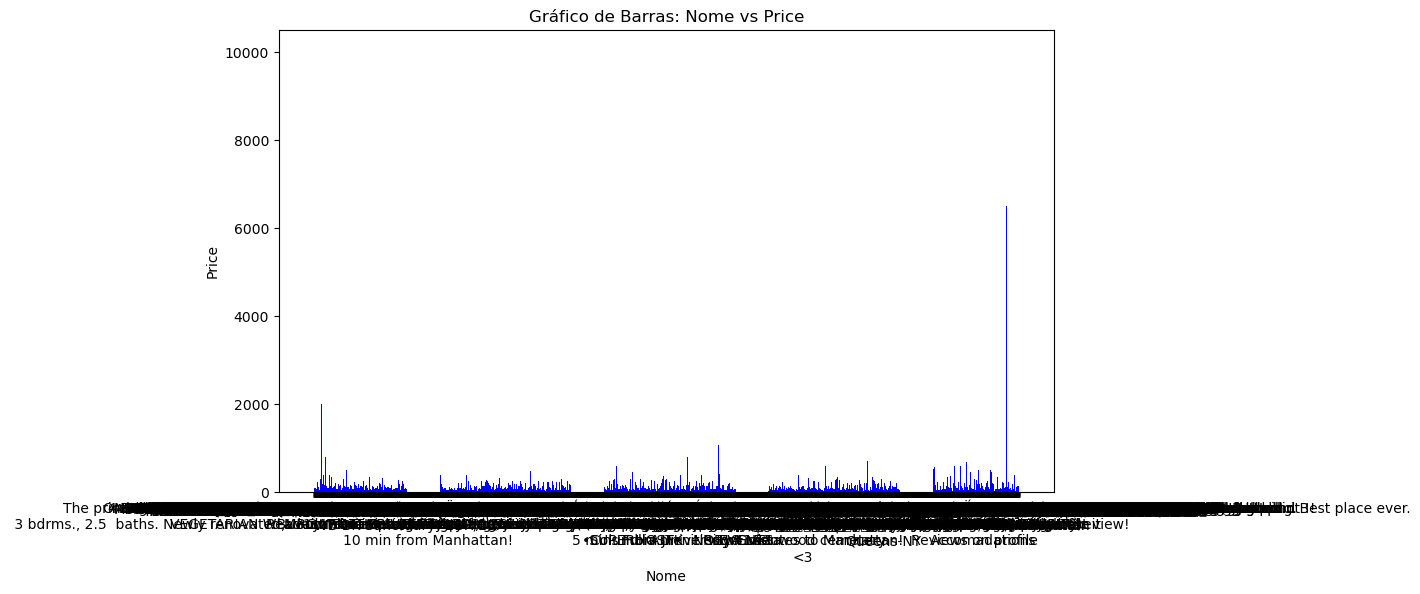

In [17]:
#gráfico a resolver
# substituindo caracter
df['nome'] = df['nome'].str.replace(r'\$', '', regex=True)

# Gráfico de barras para nome x price
plt.figure(figsize=(10, 6))
plt.bar(df['nome'], df['price'], color='blue')
plt.title('Gráfico de Barras: Nome vs Price')
plt.xlabel('Nome')
plt.ylabel('Price')
plt.show()

In [18]:
df.price.describe()

count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

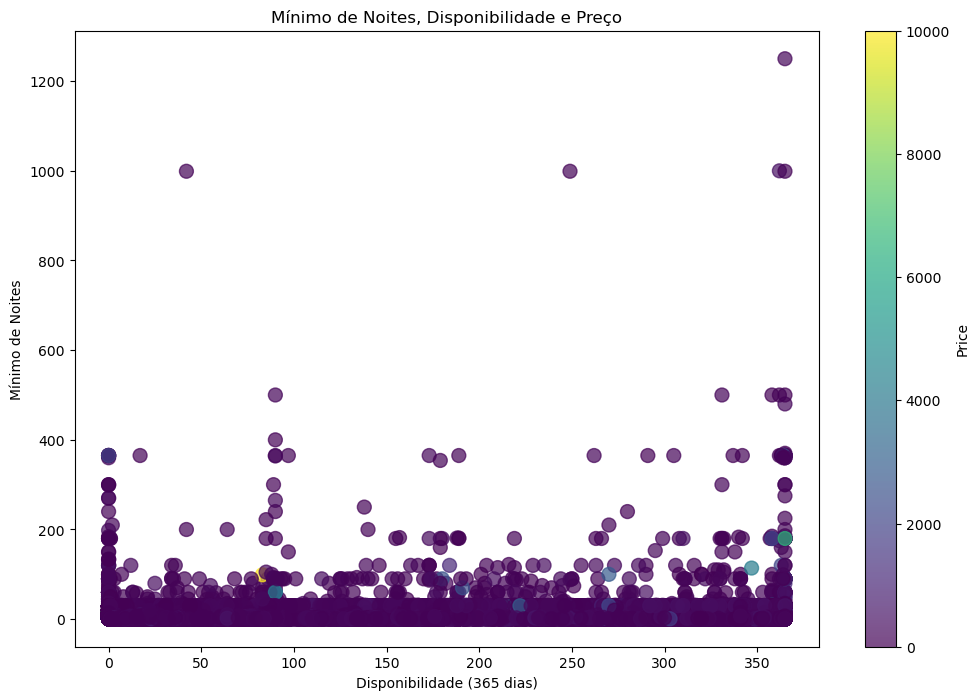

In [19]:
# gráfico de mínimo de noite, disponibilidade e preço
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['disponibilidade_365'], 
    df['minimo_noites'], 
    c=df['price'], 
    cmap='viridis', 
    s=100,  
    alpha=0.7 
)

# Adicionando barra de cores
plt.colorbar(scatter, label='Price')

plt.title('Mínimo de Noites, Disponibilidade e Preço')
plt.xlabel('Disponibilidade (365 dias)')
plt.ylabel('Mínimo de Noites')
plt.show()

#### Explicar gráfico

#### Inspeção de outliers

In [20]:
# função auxiliar para erificação de outliers
from auxiliary_functions import inspect_outliers

inspect_outliers(df, 'price' )


nome bairro_group  \
60                    Sunny & Spacious Chelsea Apartment    Manhattan   
84                   perfect for a family or small group     Brooklyn   
102    2000 SF 3br 2bath West Village private  townhouse    Manhattan   
113    2 BR / 2 Bath Duplex Apt with patio! East Village    Manhattan   
120                     3 Story Town House in Park Slope     Brooklyn   
...                                                  ...          ...   
48757    Rustic Garden House Apt, 2 stops from Manhattan       Queens   
48832   Brand New 3-Bed Apt in the Best Location of FiDi    Manhattan   
48838  Massage Spa. Stay overnight. Authors Artist dr...     Brooklyn   
48841  LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...    Manhattan   
48855  Large 3 bed, 2 bath , garden , bbq , all you need     Brooklyn   

                   bairro  latitude  longitude        room_type  price  \
60                Chelsea  40.74623  -73.99530  Entire home/apt    375   
84       Brooklyn Heights  40.69723  -73.99268  Entire home/apt    800   
102          West Village  40.73096  -74.00319  Entire home/apt    500   
113          East Village  40.72540  -73.98157  Entire home/apt    350   
120           South Slope  40.66499  -73.97925  Entire home/apt    400   
...                   ...       ...        ...              ...    ...   
48757    Long Island City  40.75508  -73.93258  Entire home/apt    350   
48832  Financial District  40.70605  -74.01042  Entire home/apt    475   
48838      Sheepshead Bay  40.59866  -73.95661     Private room    800   
48841             Chelsea  40.75204  -74.00292  Entire home/apt    350   
48855  Bedford-Stuyvesant  40.68886  -73.92879  Entire home/apt    345   

       minimo_noites  numero_de_reviews ultima_review  reviews_por_mes  \
60               180                  5    2018-11-03             0.12   
84                 1                 25    2016-08-04             0.24   
102                4                 46    2019-05-18             0.55   
113                2                  7    2017-08-09             0.06   
120                2                 16    2018-12-30             0.24   
...              ...                ...           ...              ...   
48757              2                  0           NaN              NaN   
48832              2                  0           NaN              NaN   
48838              1                  0           NaN              NaN   
48841              1                  0           NaN              NaN   
48855              4                  0           NaN              NaN   

       calculado_host_listings_count  disponibilidade_365  
60                                 1                  180  
84                                 1                    7  
102                                2                  243  
113                                4                  298  
120                                2                  216  
...                              ...                  ...  
48757                              1                  364  
48832                              1                   64  
48838                              1                   23  
48841                              1                    9  
48855                              3                  354  

[2972 rows x 13 columns]

##### Para muitas colunas do dataset a presença de outliers é possível e estes não representam um problema, vejamos em price, os outliers podem estar relacionados a acomodações que possuem um valor diferenciado em relação a grande maioria 

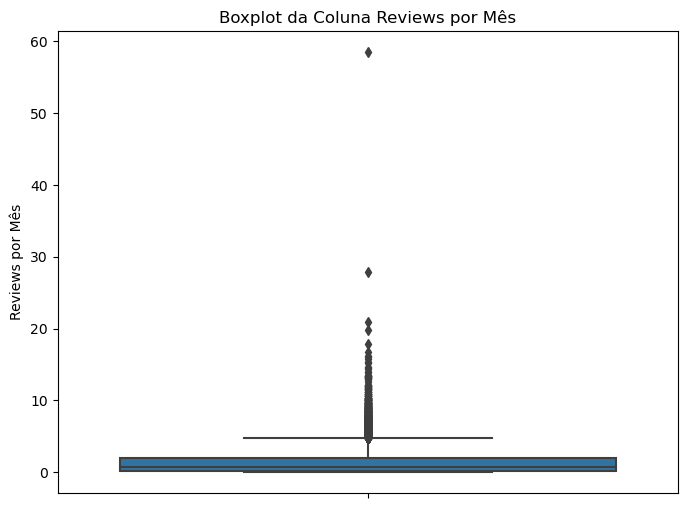

In [21]:
# Boxplot para verificação de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y='reviews_por_mes', data=df)
plt.title('Boxplot da Coluna Reviews por Mês')
plt.ylabel('Reviews por Mês')
plt.show()

#### Para os dados faltantes das colunas 'ultima_review' e 'reviews_por_mes' iremos adotar técnicas diferentes  para imputação de valores
- como os dados faltantes chegam a 20% faz-se necessário algum tipo de tratamento, pois pode ter algum impacto
- devemos lembrar que a imputação de valores, se não for feita de modo correto, pode causar viés e erros de interpretação
- para 'ultima_review', por se tratar de data, iremos criar uma coluna 'flag' com valores de 0 ou 1
- para 'reviews_por_mes', substituíremos pela mediana, tendo em vista que a distribuição desses dados não segue uma normal e possui outliers


In [22]:
# encontrando a mediana e fqzendo a imputação
median_reviews_por_mes = df['reviews_por_mes'].median()
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(median_reviews_por_mes
                                                )

In [23]:
# criando coluna flag para dados faltantes em 'ultima_review'
df['ultima_review_flag'] = df['ultima_review'].isnull().astype(int)

#### Fizemos uma análise exploratória dos dados seguida de imputação de valores e criação de coluna flag

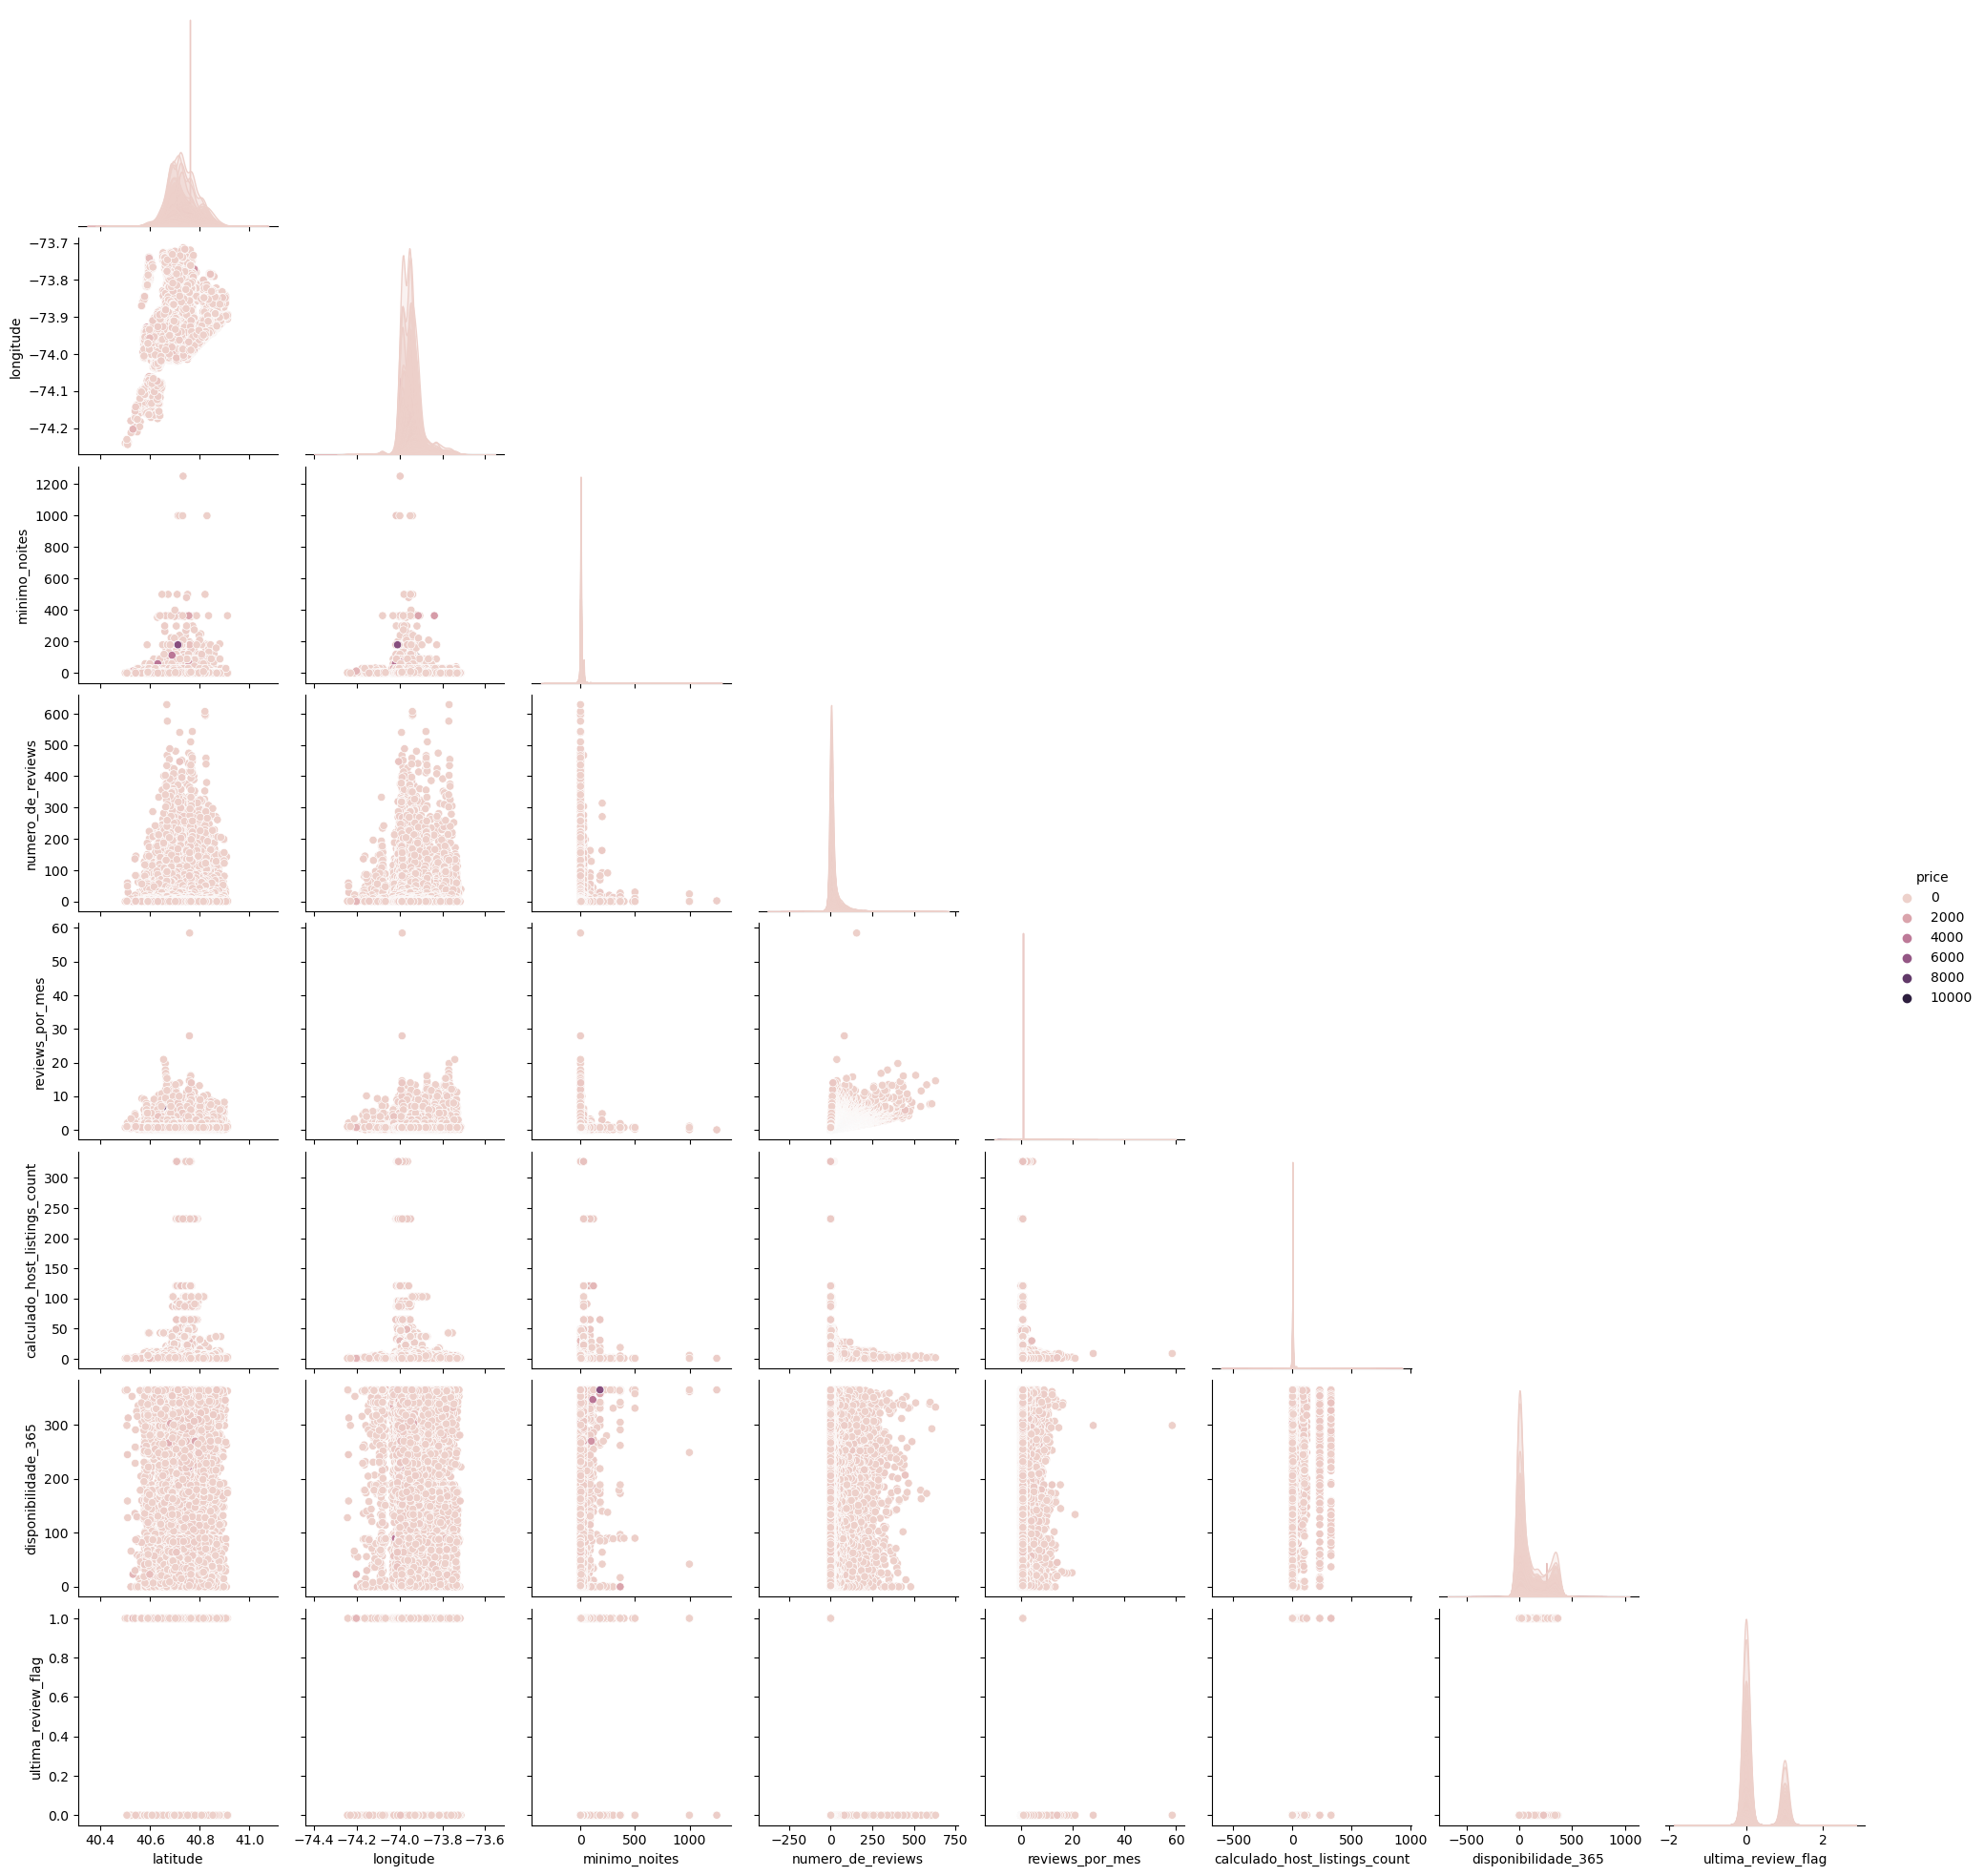

In [24]:
# realizaremos o pairplot para visualizar possíveis relações

sns.pairplot(
    df,
    diag_kind='kde',
    hue='price',
    plot_kws=dict(alpha=1.0),
    corner=True
   
);

Algoritmos q podemos utilizar:
regressão linear
svm
arvores de decisão
lightGBM

In [26]:
# colocando as variáveis numéricas em uma variável
numerical_features = df.select_dtypes(include="number").columns


In [27]:
len(numerical_features)

9

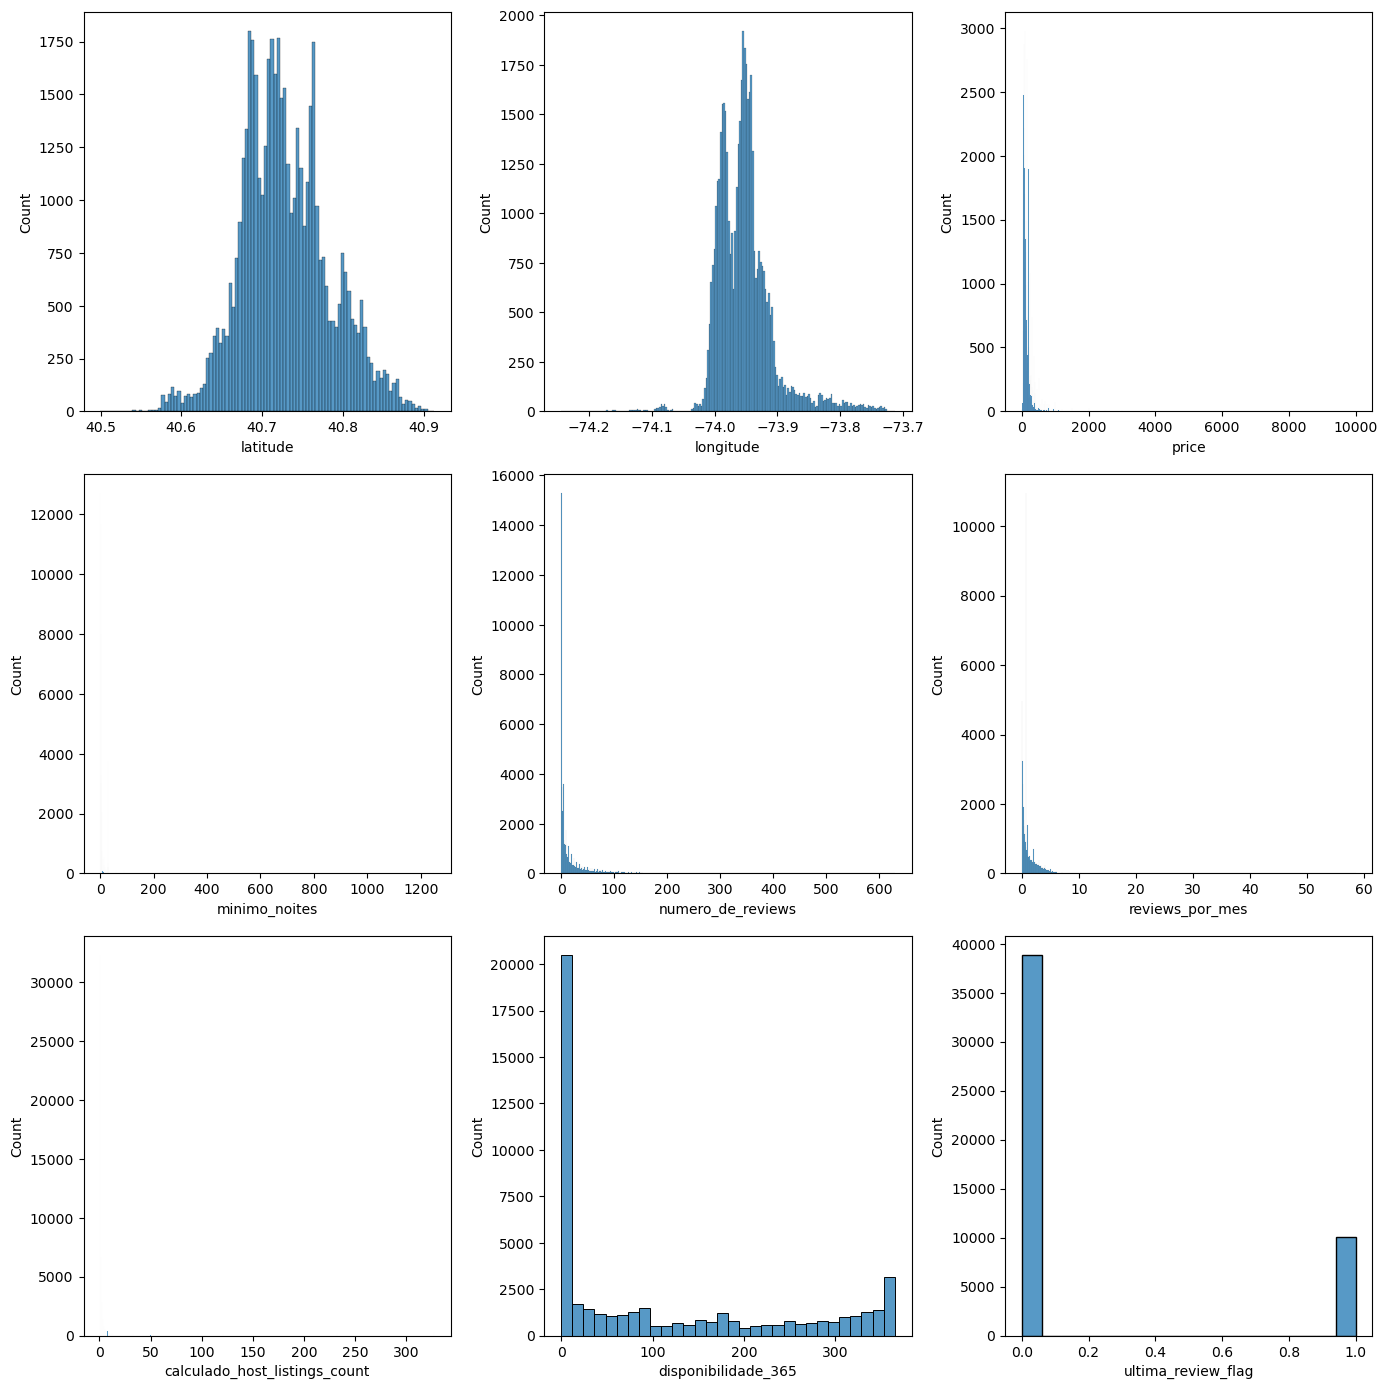

In [29]:
# histogramas para visualização da distribuição das features numéricas
fig, axs = plt.subplots(nrows=3,ncols=3, figsize=(14,14),tight_layout=True)

for ax, feature in zip(axs.flatten(),numerical_features):
    sns.histplot(x=feature, ax = ax, data= df)
    
plt.show()

In [31]:
# colunas categóricas: one hot encoder
categorical_features = df.select_dtypes(exclude="number").columns
categorical_features

Index(['nome', 'bairro_group', 'bairro', 'room_type', 'ultima_review'], dtype='object')

In [32]:
# excluindo coluna ultima_review
df = df.drop('ultima_review', axis = 1)

In [41]:
# para as colunas categóricas
one_hot_cols = ['bairro_group', 'bairro', 'room_type']

# standard scaler para padronização de latitude e longitude
standard_cols = ['latitude','longitude','price', 'minimo_noites','numero_de_reviews',
                 'reviews_por_mes','calculado_host_listings_count', 'disponibilidade_365']




In [42]:
preprocessing = ColumnTransformer(
[
    ('one_hot', OneHotEncoder(), one_hot_cols),
    ('standard', StandardScaler(), standard_cols),
])
preprocessing.fit_transform(df)

<48894x237 sparse matrix of type '<class 'numpy.float64'>'
	with 537834 stored elements in Compressed Sparse Row format>

In [43]:
preprocessed_data = preprocessing.transform(df)

In [45]:
column_names = preprocessing.get_feature_names_out()

In [46]:
preprocessed_df = pd.DataFrame(preprocessed_data.toarray(), columns=column_names)

In [47]:
preprocessed_df.index = df.index


In [48]:
print(preprocessed_df.head())

   one_hot__bairro_group_Bronx  one_hot__bairro_group_Brooklyn  \
0                          0.0                             0.0   
1                          0.0                             0.0   
2                          0.0                             1.0   
3                          0.0                             0.0   
4                          0.0                             0.0   

   one_hot__bairro_group_Manhattan  one_hot__bairro_group_Queens  \
0                              1.0                           0.0   
1                              1.0                           0.0   
2                              0.0                           0.0   
3                              1.0                           0.0   
4                              1.0                           0.0   

   one_hot__bairro_group_Staten Island  one_hot__bairro_Allerton  \
0                                  0.0                       0.0   
1                                  0.0                    